In [22]:
def printGraph(deBruijn):
  for key, val in deBruijn.items():
    print(key, '->', *val)

def compose(seq, k):
  kmerArr = []
  for i in range(len(seq)-k+1):
    kmerArr.append(seq[i:i+k])                    
  return sorted(kmerArr)

def dbGraph(kmers):
  dictionary = {}
  for e in kmers:
    beginning = (e[:-1])
    end = (e[1:])
    dictionary.setdefault(beginning, []).append(end)
  return(dictionary)

kIsTwo = compose('TAATGCCATGGGATGTT',2)
deBruijnGraphForK2 = dbGraph(kIsTwo)
printGraph(deBruijnGraphForK2)
print("\n")

kIsThree = compose('TAATGCCATGGGATGTT',3)
deBruijnGraphForK3 = dbGraph(kIsThree)
printGraph(deBruijnGraphForK3)
print("\n")

kIsFour = compose('TAATGCCATGGGATGTT',4)
deBruijnGraphForK4 = dbGraph(kIsFour)
printGraph(deBruijnGraphForK4)

A -> A T T T
C -> A C
G -> A C G G T
T -> A G G G T


AA -> AT
AT -> TG TG TG
CA -> AT
CC -> CA
GA -> AT
GC -> CC
GG -> GA GG
GT -> TT
TA -> AA
TG -> GC GG GT


AAT -> ATG
ATG -> TGC TGG TGT
CAT -> ATG
CCA -> CAT
GAT -> ATG
GCC -> CCA
GGA -> GAT
GGG -> GGA
TAA -> AAT
TGC -> GCC
TGG -> GGG
TGT -> GTT


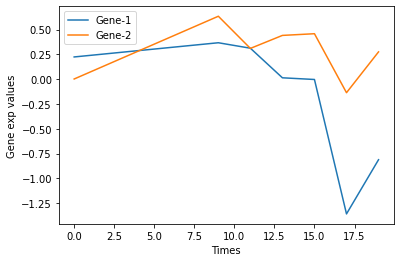

0.5714285714285715
0.1802019889115274


3839    11.534279
801      6.191016
531      4.736351
605      4.350111
562      3.921612
          ...    
806      0.003514
391      0.003382
2775     0.002873
554      0.002704
1405     0.000810
Length: 6165, dtype: float64


maximum value: YJL009W
minimum value: YPL016W


0.5353791428571428




,ID,t=0,t=9,t=11,t=13,t=15,t=17,t=19
3839,YJL009W,0.078,-0.123,0.062,-0.161,0.113,0.205,-8.950
801,YJL216C,-0.545,-1.573,-0.098,-0.268,-6.310,1.234,0.441
531,YGL184C,-1.322,-3.467,-0.051,-0.588,-4.222,1.594,1.012
605,YGR225W,-1.061,-4.479,0.735,0.220,-0.285,2.120,0.627
562,YGR043C,-0.400,-1.345,-0.282,-0.071,0.379,3.962,3.122
...,...,...,...,...,...,...,...,...
2947,YOR369C,0.164,0.343,0.162,0.345,0.163,-0.582,-1.649
3111,YAL036C,0.187,0.128,0.326,-0.482,-0.353,-1.178,-1.606
3983,YKL198C,-0.673,-0.495,-0.223,-0.291,-1.760,0.665,-0.077
5737,YMR136W,-0.384,0.232,0.750,0.357,0.906,1.469,1.734


In [25]:
import pandas as pd
from scipy.stats import spearmanr
import matplotlib.pyplot as plt

yeast =  open("/content/drive/My Drive/mnist-in-csv/yeastExpression.txt", 'r')
line1 = yeast.readline()
yeastExp = line1.split("\t")
yeastExp.remove(yeastExp[0])

list1 = []
for x in yeastExp: 
  x = x.replace('t=','')
  list1.append(int(x))

line2= yeast.readlines()
gene1= line2[0]
gene2= line2[1]
gene1=gene1.split("\t")
gene1.remove(gene1[0])
listGene1=[]
for g in gene1:
  listGene1.append(float(g))

gene2=gene2.split("\t")
gene2.remove(gene2[0])
listGene2=[]
for g in gene2:
  listGene2.append(float(g))    

plt.plot(list1, listGene1, label="Gene-1")
plt.plot(list1, listGene2, label="Gene-2")
plt.xlabel("Times")
plt.ylabel("Gene exp values")
plt.legend()
plt.show()

corr, p_value = spearmanr(listGene1,listGene2)
print(str(corr)+'\n'+str(p_value))
print("\n")

data = pd.read_table("/content/drive/My Drive/mnist-in-csv/yeastExpression.txt", delim_whitespace=True, index_col=False)
list1 = data.var(axis=1)
sort = list1.sort_values(ascending=False)
print(sort)
print("\n")

print('maximum value: ' + data.iloc[3839].ID)
print('minimum value: ' + data.iloc[1405].ID)
print("\n")

ilocData = sort[:800]
print(ilocData.iloc[799])
print("\n")

clusterData = eight_loc.to_frame()
clusters = clusterData.merge(data, left_index=True, right_index=True)
clusters = clusters.drop(columns=0)
clusters.to_csv(r'clusters.csv', index=None, sep=',')
clusters